In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from collections import defaultdict

%matplotlib inline 

In [0]:
df = pd.read_csv('http://dev.a1mc.ru/misc/BlackFriday.csv', dtype={'Product_ID':'category','Gender':'category','Age':'category','City_Category':'category','Stay_In_Current_City_Years':'category'})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
df.dtypes

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

In [0]:
df.shape

(537577, 12)

заполнение пропусков:

In [0]:
for column in df.select_dtypes(include= ['int64', 'float64']).columns.tolist():
    df[column] = df[column].fillna(df[column].mean())
for column in df.select_dtypes(include= ['category']).columns.tolist():
    df[column] = df[column].fillna(df[column].describe(include= ['category'])['top'])

масштабирование признакова:

In [0]:
scaled_columns = StandardScaler(scaler.fit_transform(df[['Occupation']]) )
print(scaled_columns)

StandardScaler(copy=array([[0.29387746],
       [0.29387746],
       [0.29387746],
       ...,
       [1.21354261],
       [1.21354261],
       [1.21354261]]),
               with_mean=True, with_std=True)


кодирование категориальных:

In [0]:
encoded =  OneHotEncoder().fit_transform(df)
print(encoded)

  (0, 0)	1.0
  (0, 6561)	1.0
  (0, 9514)	1.0
  (0, 9516)	1.0
  (0, 9533)	1.0
  (0, 9544)	1.0
  (0, 9549)	1.0
  (0, 9552)	1.0
  (0, 9556)	1.0
  (0, 9580)	1.0
  (0, 9599)	1.0
  (0, 16189)	1.0
  (1, 0)	1.0
  (1, 8265)	1.0
  (1, 9514)	1.0
  (1, 9516)	1.0
  (1, 9533)	1.0
  (1, 9544)	1.0
  (1, 9549)	1.0
  (1, 9552)	1.0
  (1, 9554)	1.0
  (1, 9576)	1.0
  (1, 9601)	1.0
  (1, 21598)	1.0
  (2, 0)	1.0
  :	:
  (537574, 15862)	1.0
  (537575, 4619)	1.0
  (537575, 8627)	1.0
  (537575, 9515)	1.0
  (537575, 9519)	1.0
  (537575, 9539)	1.0
  (537575, 9546)	1.0
  (537575, 9548)	1.0
  (537575, 9552)	1.0
  (537575, 9558)	1.0
  (537575, 9580)	1.0
  (537575, 9599)	1.0
  (537575, 15139)	1.0
  (537576, 4619)	1.0
  (537576, 6980)	1.0
  (537576, 9515)	1.0
  (537576, 9519)	1.0
  (537576, 9539)	1.0
  (537576, 9546)	1.0
  (537576, 9548)	1.0
  (537576, 9552)	1.0
  (537576, 9558)	1.0
  (537576, 9578)	1.0
  (537576, 9599)	1.0
  (537576, 14842)	1.0


In [0]:
df.apply(LabelEncoder().fit_transform)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,670,0,0,10,0,2,0,2,8,9,6583
1,0,2374,0,0,10,0,2,0,0,4,11,11992
2,0,850,0,0,10,0,2,0,11,8,9,473
3,0,826,0,0,10,0,2,0,11,13,9,381
4,1,2732,1,6,16,2,4,0,7,8,9,6182
5,2,1829,1,2,15,0,3,0,0,0,9,12019
6,3,1743,1,4,7,1,2,1,0,6,14,14996
7,3,3318,1,4,7,1,2,1,0,14,9,12646
8,3,3596,1,4,7,1,2,1,0,15,9,12478
9,4,2629,1,2,20,0,1,1,7,8,9,6084


Исследуем распределение данных:

In [0]:
df[df.isnull().any(axis=1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [0]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4.223872,2.279938,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,8.000000,12.669840,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.842144,12.669840,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,12.669840,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Все переменные - численные, поэтому нет смысла исследовать уникальные значения

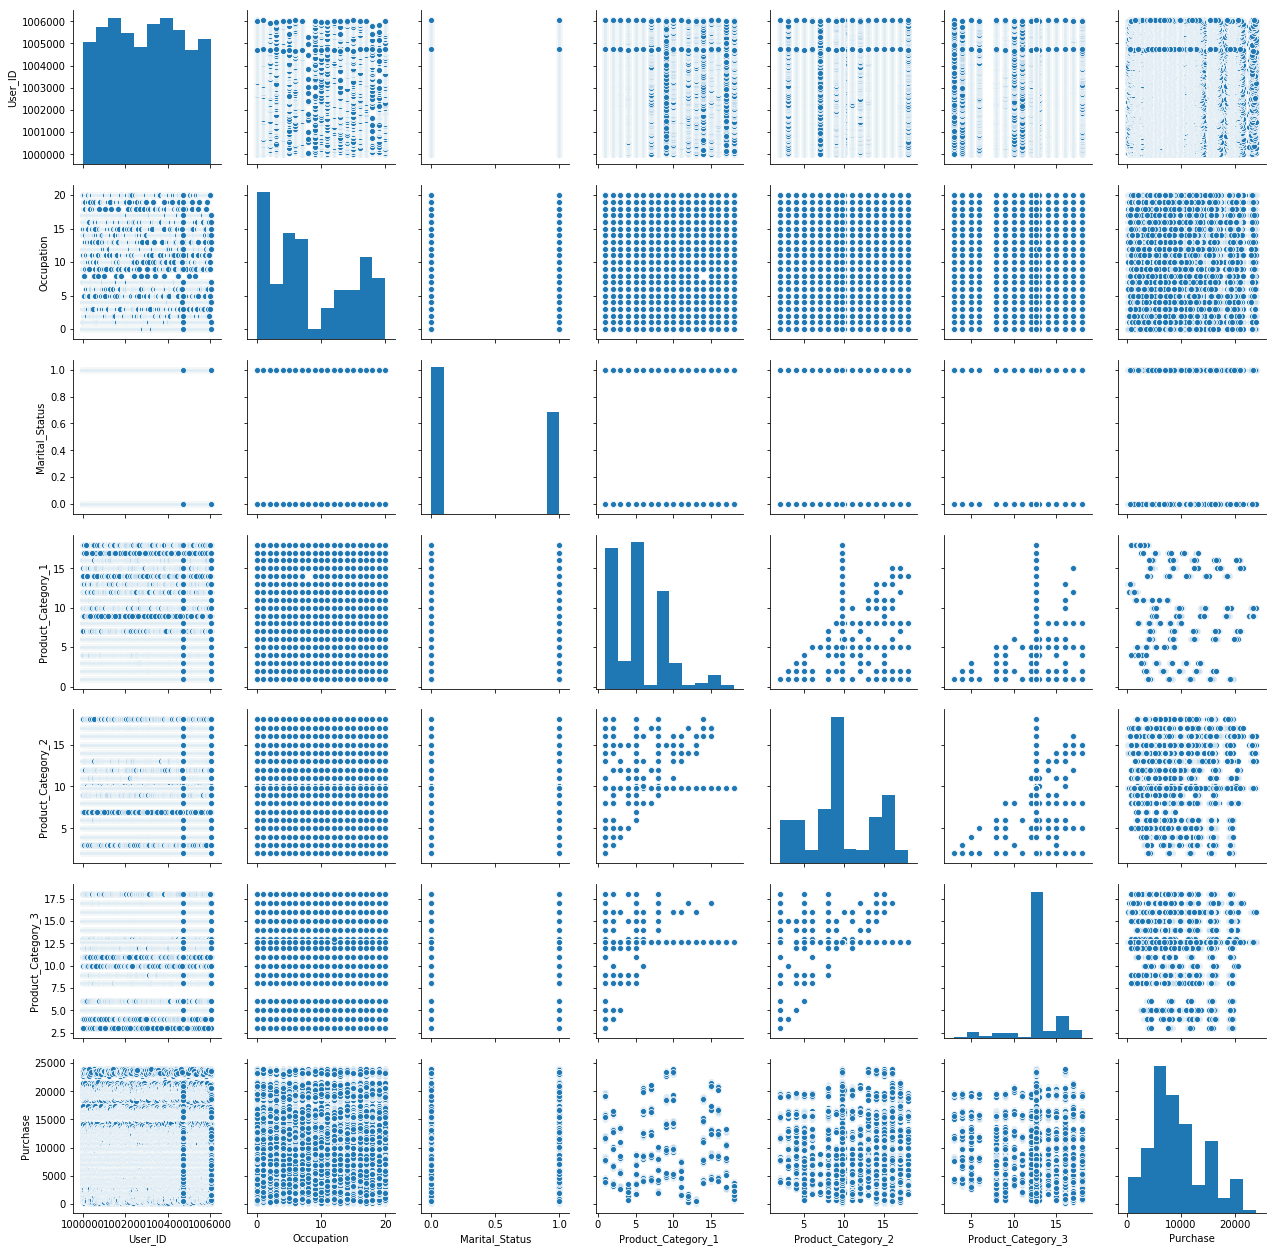

In [0]:
sns.pairplot(data= df)

корреляция пирсона:

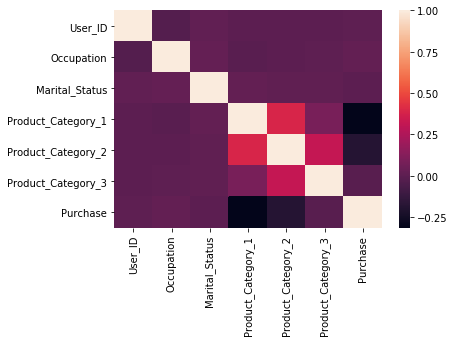

In [0]:
sns.heatmap(df.corr())